# Giới thiệu cơ bản về Scikit learn

## Giới thiệu cơ bản

### Giới thiệu

`sklearn` là một package rất mạnh trong Python cho phép làm việc với nhiều mô hình machine learning. Xây dựng mô hình dự báo trong `sklearn` được chuẩn hóa hơn trong `R` và có các đặc điểm sau.

- Ma trận biến đầu vào (features matrix): Chỉ nhận dạng số và là dạng array 2 chiều
- Mảng giá trị dự báo (target array): Chỉ nhận dạng số

So với `R` cho phép dữ liệu đầu vào là `dataframe`, đây là các khác biệt rất lớn.

Các bước thực hiện mô hình dự báo với sklearn có thể khái quát như sau:

1. Lựa chọn mô hình dự báo
2. Lựa chọn tham số cho mô hình
3. Chia dữ liệu thành ma trận biến đầu vào và mảng giá trị dự báo
4. Fit mô hình với hàm `fit`
5. Áp dụng mô hình cho dữ liệu mới với `predict`

### Ví dụ về regression

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_3700\3330530004.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


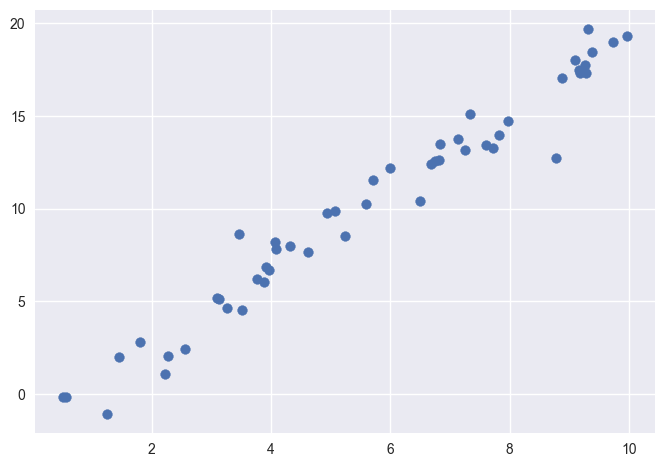

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
%matplotlib inline
rng = np.random.RandomState(50)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

**Xây dựng mô hình với sklearn**

In [7]:
# Step 1: Lựa chọn mô hình
from sklearn.linear_model import LinearRegression
# Step 2: Lựa chọn parameter, cho phép fit offset
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [8]:
# Step 3: Chia data thành matrix features và target array
X = x[:, np.newaxis]

**Lưu ý**: `np.newaxis` cho phép tăng thêm 1 chiều của 1 array. Vì dữ liệu `X` đầu vào yêu cầu mảng 2 chiều, nên cần phải sử dụng `np.newaxis` để tăng chiều của X

In [9]:
X.shape

(50, 1)

In [10]:
x.shape

(50,)

In [11]:
# Step 4: Fit model
model.fit(X, y)

LinearRegression()

In [12]:
# Coefficient
model.coef_

array([2.09046825])

In [13]:
# Intercept
model.intercept_

-1.624851438969996

In [14]:
# Step 5: Dự báo trên tập mới
xfit = np.linspace(-1, 11)
# Chuyển sang dạng feature matrix
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

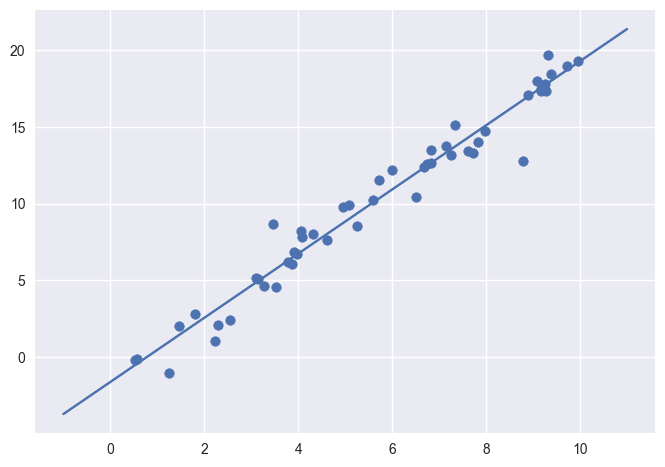

In [15]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

### Ví dụ về bài toán phân loại

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
X = iris.data
y = iris.target

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [19]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_model = model.predict(X)

In [21]:
# Đánh giá accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### Ví dụ với train test (hold out)

Ta tiếp tục sử dụng mô hình k-nearest neighborshood nhưng sử dụng train, test

In [22]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0,
                                 train_size = 0.5)

In [23]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [24]:
y2_model = model.predict(X2)

In [25]:
accuracy_score(y2, y2_model)

0.9066666666666666

**Cross validation**

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Grid search

Khi sử dụng mô hình dự báo, ta thường sử dụng `grid search` khi `tuning`

In [37]:
# Tạo data.frame
import numpy as np
def make_data(N, err=1.0, rseed=1):
            # randomly sample the data
            rng = np.random.RandomState(rseed)
            X = rng.rand(N, 1) ** 2
            y = 10 - 1. / (X.ravel() + 0.1)
            if err > 0:
                y += err * rng.randn(N)
            return X, y
X, y = make_data(40)

In [40]:
# Chọn mô hình
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

In [42]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [43]:
grid.fit(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [44]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Trực quan hóa kết quả mô hình

In [45]:
model = grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [46]:
y_predict = model.fit(X, y).predict(X)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

NameError: name 'y_predict' is not defined

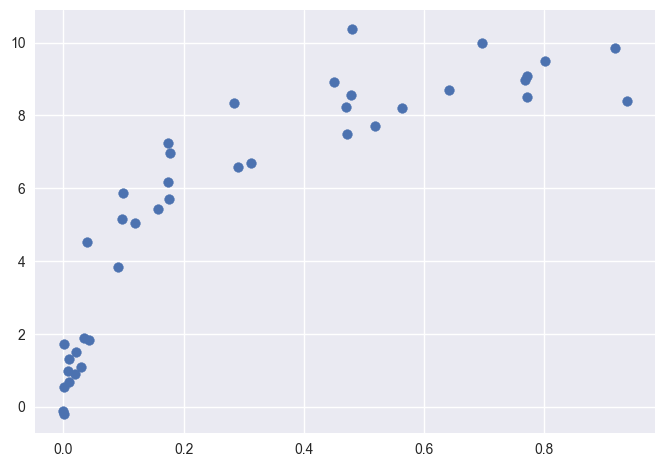

In [47]:
plt.scatter(X.ravel(), y)
plt.scatter(X, y_predict)

### Feature Engineering

#### Categorical

Sử dụng onehot-encoding

In [48]:
 data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
           {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
           {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
           {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]
# Trước khi transform
import pandas as pd
pd.DataFrame(data)

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


Sử dụng onehot-encoding để biến đổi category

In [49]:
from sklearn.feature_extraction import DictVectorizer

In [50]:
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

#### Missing data

In [51]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
                      [ 3,   7,   9  ],
                      [ 3,   5,   2  ],
                      [ 4,   nan, 6  ],
                      [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

In [52]:
from sklearn.preprocessing import Imputer 

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\anhhd3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [53]:
imp = Imputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

NameError: name 'Imputer' is not defined

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X2, y)
model.predict(X2)

ValueError: Found input variables with inconsistent numbers of samples: [75, 5]

### Pipeline

Điểm rất mạnh của Python là cho phép xây dựng pipeline khi xây dựng mô hình. Với mô hình trên, giả sử ta muốn thực hiện các bước như sau

1. Thay missing value với mean
2. Biến đổi feature thành dạng bình phương
3. Xây mô hình hồi quy

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(Imputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      LinearRegression())

NameError: name 'Imputer' is not defined

In [56]:
model.fit(X, y)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [57]:
print(y)
print(model.predict(X))

[14 16 -1  8 -5]


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Khái quát về các module của sklearn

Trong sklearn có các module lớn sau:

- `dataset`: Data mẫu trong mô hình
    - `load_iris`
    - `load_wine`
    - `load_boston`
    - `load_breast_cancer`
    - `load_diabetes`
 
 Ngoài ra, modules `dataset` còn cho phép tạo sample mẫu như sau:
 
     - `make_blobs`: Tạo blobs cho cluster
     - `make_regression`: Tạo dataset cho regression
     - `make_multiple_classification`: Multi class problem
 
- `preprocessing`: Feature Engineering data
    - `Binarizer`: Bins dữ liệu thành dạng 0,1 dựa vào threshold
    - `KBinsDiscretizer`: Bins dữ liệu
    - `LabelEncoder`: Encode thành dạng 0..n-1
    - `QuantileTransformer`: Chuyển dữ liệu thành dạng Quantile
    - `StandardScaler`: Chuyển về z-score
    - `maxabs_scale`: Chuyển về dạng [-1.1]
    - `minmax_scale`: Chuyển dữ liệu về bất cứ scale nào
- `cluser`: Unsupervised learning
    - `k_means`
- `decomposiiton`: Tổng hợp các phương pháp giảm biên
    - `FactorAnalysis`: FA
    - `PCA`
- `ensemble`: Các phương pháp ensemble
    - `GradientBoostingClassifier`
    - `GradientBoostingRegressor`
- `feature_extraction`: Chiết xuất biến từ images và text
    - `DictVectorizer`
- `impute`: Impute mising value
- `linear_moel`: Mô hình hồi quy
    - `LinearRegression`: OLS
- `metrics`: Các chỉ số đánh giá mô hình
    - `accuracy_score`
    - `auc`
    - `roc_auc_score`
    - `roc_curve`
    - `r2_score`
    - `mean_squared_error`
- `model_selection`: Module hỗ trợ chia train, test, cross-validation, optimization, validation
    - `train_test_split`
    - `LeaveOneOut`
    - `StratifiedKFold`
    - `cross_validate`: Đánh giá score dựa vào cross validation
- `neighbours`: Sử dụng phương pháp nearest neighbors
- `neural_network`
- `pipeline`: Module sử dụng pipeline trong machine learning
- `svm`: Support Vector Machines
- `tree`: Decision Tree
    - DecisionTreeClassifier
    - DecisionTreeRegressor
    - export_graphviz: Export tree dưới dạng DOT

## Lưu mô hình để sử dụng

Ta có thể lưu mô hình từ sklearn để sử dụng sau với package pickle

In [58]:
from sklearn.datasets import load_iris
from sklearn import svm

In [59]:
model = svm.SVC(gamma = 'scale', probability = True)
iris = load_iris()

**Lưu ý**: Đặt `probability = True` khi đặt class prediction để có thể dự báo điểm xác suât

In [60]:
X, y = iris.data, iris.target

In [61]:
model.fit(X, y)

SVC(probability=True)

In [62]:
# Save mô hình
import pickle
s = pickle.dumps(model)

In [63]:
model_2 = pickle.loads(s)

In [64]:
model_2.predict(X[1:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
model_2.predict_proba(X[:10])

array([[0.97772382, 0.01412789, 0.0081483 ],
       [0.96963025, 0.02119467, 0.00917508],
       [0.97882799, 0.01324596, 0.00792605],
       [0.96907328, 0.02134914, 0.00957759],
       [0.97961006, 0.01247481, 0.00791513],
       [0.96102885, 0.02679523, 0.01217592],
       [0.97726447, 0.01427415, 0.00846138],
       [0.97303911, 0.01809508, 0.00886581],
       [0.96947173, 0.02068051, 0.00984776],
       [0.96932439, 0.02144274, 0.00923287]])

**Save với joblist**

In [66]:
from sklearn.externals import joblib
file_name = "final_model.sav"
joblib.dump(model, file_name)

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\anhhd3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\externals\__init__.py)

In [67]:
loaded_model = joblib.load('final_model.sav')

NameError: name 'joblib' is not defined

In [68]:
loaded_model.predict(X[:150])

NameError: name 'loaded_model' is not defined

## Tài liệu tham khảo

https://scikit-learn.org/stable/modules/classes.html
